In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_clean = pd.read_csv('data/Cleaned.csv')
df_unclean = pd.read_csv('data/uncleaned.csv')

/tmp/ipykernel_9118/1339596951.py:2: DtypeWarning: Columns (1,8,12,22,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_unclean = pd.read_csv('data/uncleaned.csv')


In [3]:
# 1. Missing Data Visualization for Uncleaned Data
print("Cleaned dataset shape:", df_clean.shape)
print("Uncleaned dataset shape:", df_unclean.shape)

# Count of missing values per column for uncleaned data
missing_unclean = df_unclean.isnull().sum().sort_values(ascending=False)
print("Missing values in uncleaned data:\n", missing_unclean)

# Count of missing values per column for cleaned data
missing_clean = df_clean.isnull().sum().sort_values(ascending=False)
print("Missing values in cleaned data:\n", missing_clean)

# Descriptive statistics for an overview of the latency metric
print("Descriptive statistics for svr1 (Uncleaned):")
print(df_unclean['svr1'].describe())

print("Descriptive statistics for svr1 (Cleaned):")
print(df_clean['svr1'].describe())

Cleaned dataset shape: (2315616, 33)
Uncleaned dataset shape: (3042495, 32)
Missing values in uncleaned data:
 svr4                593977
svr3                593975
svr2                593975
svr1                593975
square_id           560818
truck               343812
speed               343810
latitude            343809
longitude           343809
hour                343807
sec                 343807
min                 343807
timezone            343807
Date                343806
Month               343806
Day                 343806
Year                343806
CWnd                330794
Retransmissions     330791
Transfer size-RX    329035
Bitrate-RX          329035
Role-RX             329033
Transfer unit-RX    329032
bitrate_unit-RX     329032
Bitrate             328962
Transfer size       328962
Role                328960
bitrate_unit        328959
cwnd_unit           328959
Transfer unit       328959
send_data           253533
time                     0
dtype: int64
Missing valu

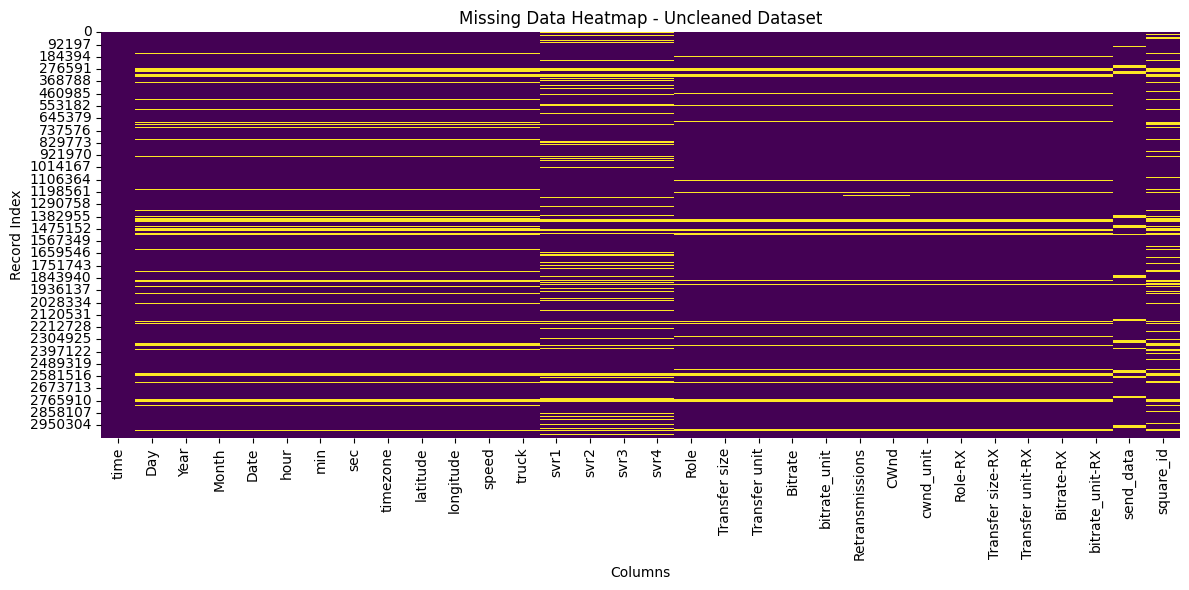

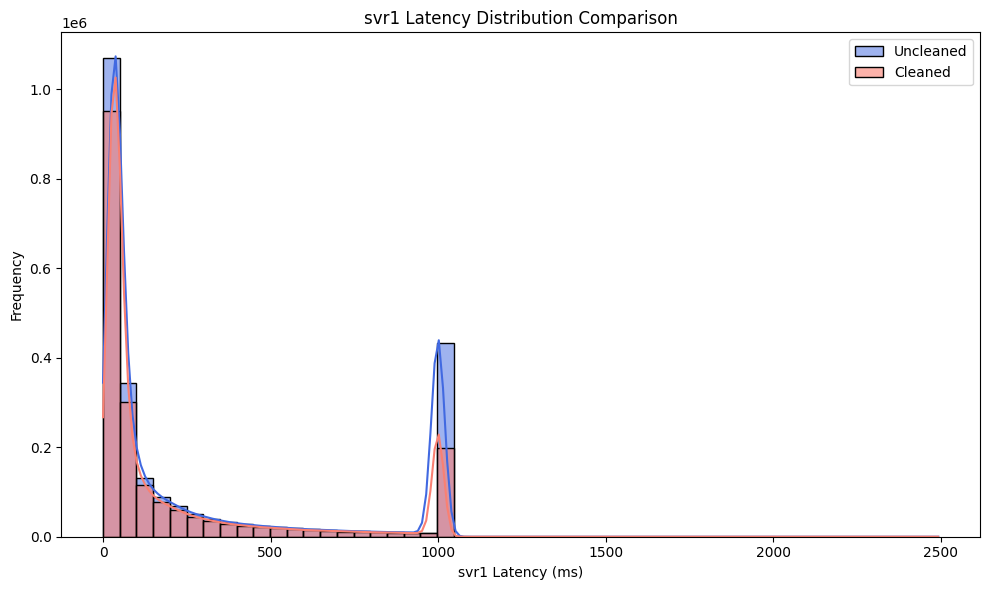

In [4]:
# 2. Distribution of svr1 latency for both datasets
plt.figure(figsize=(12, 6))
sns.heatmap(df_unclean.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap - Uncleaned Dataset")
plt.xlabel("Columns")
plt.ylabel("Record Index")
plt.tight_layout()
plt.show()

# 2. Distribution of svr1 latency for both datasets
plt.figure(figsize=(10, 6))
sns.histplot(df_unclean['svr1'].dropna(), bins=50, kde=True, color='royalblue', label='Uncleaned')
sns.histplot(df_clean['svr1'].dropna(), bins=50, kde=True, color='salmon', label='Cleaned', alpha=0.6)
plt.xlabel('svr1 Latency (ms)')
plt.ylabel('Frequency')
plt.title('svr1 Latency Distribution Comparison')
plt.legend()
plt.tight_layout()
plt.show()

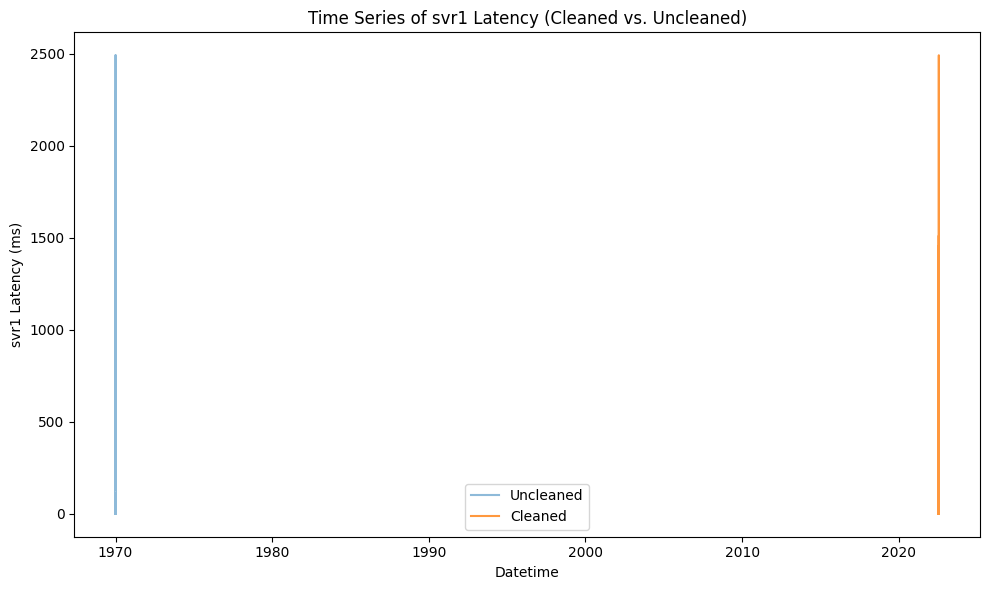

In [6]:
# 3. Time Series Comparison for svr1 latency
# Ensure datetime conversion (assuming column 'datetime' exists and is in an appropriate format)
df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])
df_unclean['datetime'] = pd.to_datetime(df_unclean['time'])

# Sorting data by datetime
df_clean.sort_values(by='datetime', inplace=True)
df_unclean.sort_values(by='datetime', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df_unclean['datetime'], df_unclean['svr1'], alpha=0.5, label='Uncleaned')
plt.plot(df_clean['datetime'], df_clean['svr1'], alpha=0.8, label='Cleaned')
plt.xlabel('Datetime')
plt.ylabel('svr1 Latency (ms)')
plt.title('Time Series of svr1 Latency (Cleaned vs. Uncleaned)')
plt.legend()
plt.tight_layout()
plt.show()

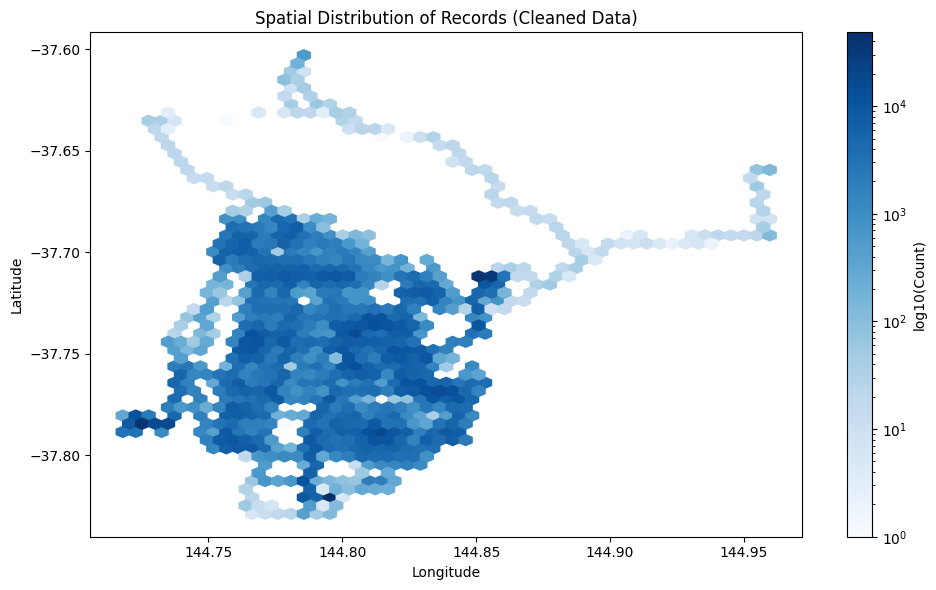

In [7]:
# 4. Spatial Distribution of Data using Hexbin Plots (for cleaned data)
# Assuming columns 'latitude' and 'longitude' are present and valid
plt.figure(figsize=(10, 6))
plt.hexbin(df_clean['longitude'], df_clean['latitude'], gridsize=50, cmap='Blues', bins='log')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Records (Cleaned Data)")
cb = plt.colorbar()
cb.set_label('log10(Count)')
plt.tight_layout()
plt.show()

In [11]:
# Drop rows with NaN in 'svr1', 'latitude', or 'longitude'
df_clean = df_clean.dropna(subset=['svr1', 'latitude', 'longitude'])

# Interactive Map with Plotly (for cleaned data)
fig = px.scatter_map(
    df_clean,
    lat="latitude",
    lon="longitude",
    color="svr1",
    size="svr1",  # Ensure no NaN values in 'svr1'
    hover_data=["truck", "datetime"],
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=5,
    title="Interactive Map of svr1 Latency in Cleaned Data"
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed